In [1]:
%matplotlib inline
import plot_helpers as ph
from matplotlib import pyplot as plt

In [2]:
fairgp_files = [
    ('../results/parity_tar_adult_2018-09-10/adult_race_numerical-binsensitive.csv', ''),
    #('../results/parity_tar_adult_2018-09-10/adult_sex_numerical-binsensitive.csv', ''),
]
def label_change(label):
    parts = label.split('_')
    #mode = parts[-1]
    in_True = parts[4] == "True"
    optional_star = "*" if in_True else ""
    with_s = ", use $s$" if in_True else ""
    #return f"FairGPparity{optional_star}", in_True
    #return "average" if mode == "True" else mode, True
    num = label.split('_')[-1]
    return f"$PR_t={num}${with_s}", not in_True

fairgp = ph.parse_all(fairgp_files, label_change)

In [3]:
baseline_files = [
    ('../results/parity_opp_update_2018-08-28/par_fixed/adult_race_baseline.csv', ''),
    #('../results/parity_opp_update_2018-08-28/par_fixed/adult_sex_baseline.csv', ''),
]
def label_change(label):
#     algos = [
#         #'ZafarFairness',
#         #'ZafarAccuracy',
#         #'SVM',
#         #'GP',
#         #'DecisionTree',
#     ]
#     if label in algos:
#         return label, True
    #if label == 'ZafarAccuracy':
    #    return 'baseline: Zafar', True
    if label == 'SVM':
        return 'baseline: SVM', True

baselines = ph.parse_all(baseline_files, label_change)

In [4]:
#data = ph.merge_plot_defs(fairgp, baselines)

In [5]:
fairgp = ph.choose_entries(fairgp, [0, 5, 1, 6, 2, 7, 3, 8, 4, 9])

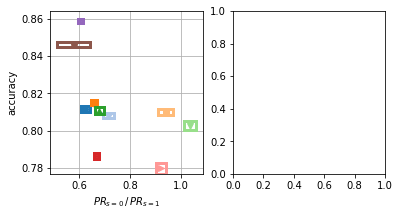

In [6]:
xaxis = ('DIbinary', '$PR_{s=0}\\,/\\,PR_{s=1}$')
yaxis = ('accuracy', 'accuracy')
fig, plots = plt.subplots(ncols=2, figsize=(6, 3))
ph.errorbox(plots[0], fairgp[0], xaxis, yaxis, legend=None)
ph.errorbox(plots[0], baselines[0], xaxis, yaxis, legend=None, firstcolor=4, firstshape=8)
#plot.set_ylim(0.785, 0.865)
#plot.set_xlim(0.2, 1.5)
#fig.savefig("/its/home/tk324/dev/latex/nips2018_workshop/figures/dempar_acc_vs_di.eps", dpi=200, bbox_extra_artists=[], bbox_inches='tight')

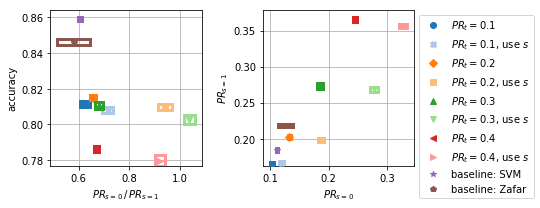

In [7]:
xaxis = ('0-PR-race', '$PR_{s=0}$')
yaxis = ('1-PR-race', '$PR_{s=1}$')
legends = []
legends.append(ph.errorbox(plots[1], fairgp[0], xaxis, yaxis, legend="outside"))
legends.append(ph.errorbox(plots[1], baselines[0], xaxis, yaxis, legend="outside", firstcolor=4, firstshape=8))
#plot.set_ylim(0.785, 0.865)
#plot.set_xlim(0.2, 1.5)
fig.tight_layout()
fig.savefig("/its/home/tk324/dev/latex/nips2018_workshop/figures/dempar2.pdf", dpi=200, bbox_extra_artists=legends, bbox_inches='tight')
fig

In [17]:
ms = 4

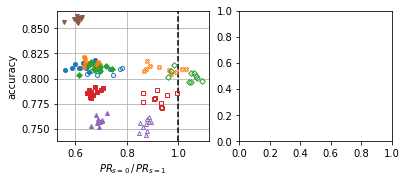

In [31]:
xaxis = ('DIbinary', '$PR_{s=0}\\,/\\,PR_{s=1}$')
yaxis = ('accuracy', 'accuracy')
fig, plots = plt.subplots(ncols=2, figsize=(6, 2.4))
plots[0].axvline(x=1.0, linestyle='--', color='k')
ph.scatter(plots[0], fairgp[0], xaxis, yaxis, legend=None, markersize=ms)
ph.scatter(plots[0], baselines[0], xaxis, yaxis, legend=None, startindex=5, markersize=ms)
#plot.set_ylim(0.785, 0.865)
#plot.set_xlim(0.2, 1.5)
#fig.savefig("/its/home/tk324/dev/latex/nips2018_workshop/figures/dempar_acc_vs_di.eps", dpi=200, bbox_extra_artists=[], bbox_inches='tight')

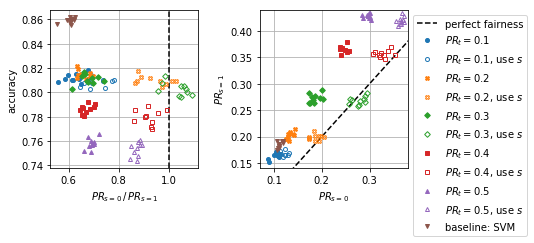

In [32]:
xaxis = ('0-PR-race', '$PR_{s=0}$')
yaxis = ('1-PR-race', '$PR_{s=1}$')
legends = []
plots[1].plot([0., 1.], [0., 1.], 'k--', label="perfect fairness")
legends.append(ph.scatter(plots[1], fairgp[0], xaxis, yaxis, legend="outside", markersize=ms))
legends.append(ph.scatter(plots[1], baselines[0], xaxis, yaxis, legend="outside", startindex=5, markersize=ms))
plots[1].set_ylim(0.14, 0.44)
plots[1].set_xlim(0.07, 0.38)
fig.tight_layout()
fig.subplots_adjust(bottom=0)
fig.savefig("/its/home/tk324/dev/latex/nips2018_workshop/figures/dempar.pdf", dpi=200, bbox_extra_artists=legends,
            bbox_inches='tight', pad_inches=0)
fig